In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
train.shape

(891, 12)

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.describe(include=['O'])
#describe(include = ['O']) will show the descriptive statistics of object data types.

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",male,347082,G6,S
freq,1,577,7,4,644


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.shape

(418, 11)

In [11]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [13]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
#Relationship between Features and Survival

In [15]:
survived = train[train['Survived'] == 1]
not_survived = train[train['Survived'] == 0]

print ("Survived: %i (%.1f%%)"%(len(survived), float(len(survived))/len(train)*100.0))
print ("Not Survived: %i (%.1f%%)"%(len(not_survived), float(len(not_survived))/len(train)*100.0))
print ("Total: %i"%len(train))

Survived: 342 (38.4%)
Not Survived: 549 (61.6%)
Total: 891


In [16]:
#Pclass vs. Survival
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [17]:
train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [18]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


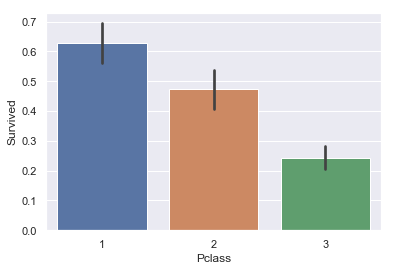

In [19]:
sns.barplot(x='Pclass', y='Survived', data=train)

In [20]:
#sex vs. survival
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [21]:
train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [22]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


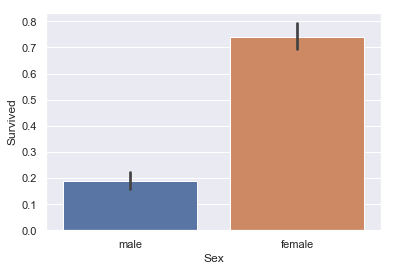

In [23]:
sns.barplot(x='Sex', y='Survived', data=train)

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347
Pclass
1    216
2    184
3    491
dtype: int64


Text(0, 0.5, 'Percentage')

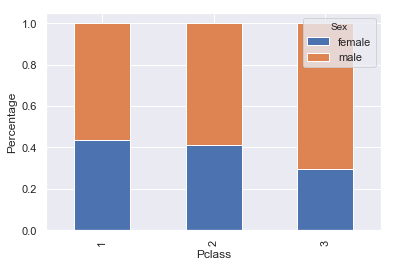

In [24]:
#Pclass & Sex vs. Survival
#to find out how many males and females are there in each Pclass(infer:more male in pclass=3)
tab = pd.crosstab(train['Pclass'], train['Sex'])
print(tab)
print(tab.sum(1))
#stacked bar diagram
tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Percentage')

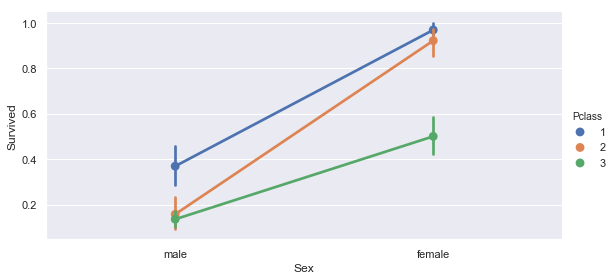

In [25]:
sns.factorplot('Sex', 'Survived', hue='Pclass', size=4, aspect=2, data=train)
#infer: female(1&2nd class=very high survival);male(2&3rd class=very low survival)

In [26]:
#Embarked vs. Survived
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
train.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [28]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


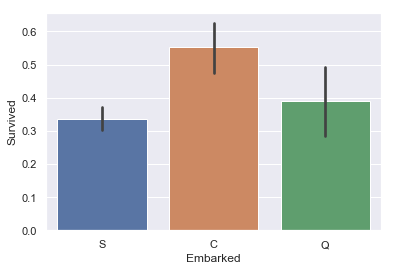

In [29]:
sns.barplot(x='Embarked', y='Survived', data=train)

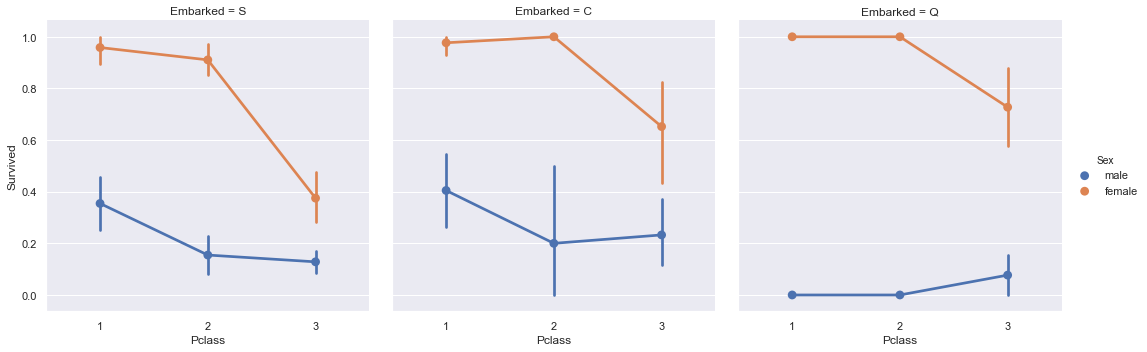

In [30]:
#Pclass, Sex & Embarked vs. Survival 
#infer: Almost all females from Pclass 1 and 2 survived.
        #Females dying were mostly from 3rd Pclass.
        #Males from Pclass 1 only have slightly higher survival chance than Pclass 2 and 3.
sns.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=train)

In [31]:
#parch vs survival
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [32]:
train.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [33]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


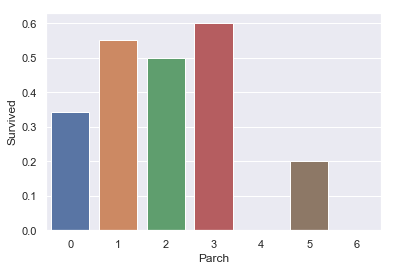

In [34]:
sns.barplot(x='Parch', y='Survived', ci=None, data=train) # ci=None will hide the error bar

In [35]:
#SibSp vs. Survival
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [36]:
train.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [37]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


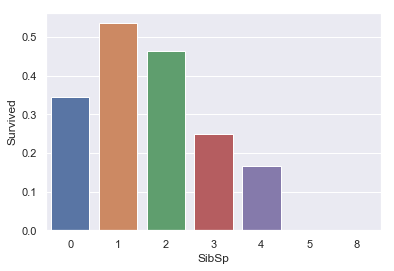

In [38]:
sns.barplot(x='SibSp', y='Survived', ci=None, data=train)

In [39]:
#Age, sex,pclass vs. Survival
#sns.factorplot(x='Sex', y='Age', hue='Survived', col='Pclass', data=train)
#because it's confusing to understand,use violin plot

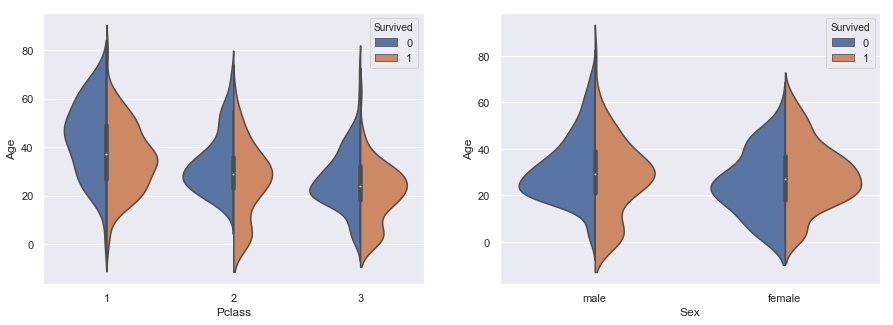

In [40]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train, split=True, ax=ax1)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=train, split=True, ax=ax2)
#infer(plot1): 1st Pclass has very few children as compared to other two classes
                #1st Plcass has more old people as compared to other two classes
                #Almost all children (between age 0 to 10) of 2nd Pclass survived
                #Most children of 3rd Pclass survived.
                #most old people of 1st pclass didn't survive
#infer(plot2): Most male children (between age 0 to 14) survived.
               #Females with age between 18 to 40 have better survival chance

In [41]:
#feature extraction

In [42]:
#name feature
train_test_data = [train, test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')

In [43]:
train[['Name','Title']].head(3)

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss


In [44]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [45]:
#replacing lesser used title to other
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', \
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


In [46]:
#convert the categorical Title values into numeric form
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [47]:
train[['Name','Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",3
2,"Heikkinen, Miss. Laina",2
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",3
4,"Allen, Mr. William Henry",1


In [48]:
#sex feature
#categorical value of Sex into numeric;0:female and 1:male
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [49]:
train[['Name','Sex']].head(3)

,Name,Sex
0,"Braund, Mr. Owen Harris",0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,"Heikkinen, Miss. Laina",1


In [50]:
#embarked feature
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [51]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [52]:
#category "S" has maximum passengers. Hence, we replace "nan" values with "S"
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [53]:
#convert the categorical value of Embarked into numeric
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [54]:
train[['Name','Embarked']].head(3)

,Name,Embarked
0,"Braund, Mr. Owen Harris",0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,"Heikkinen, Miss. Laina",0


In [55]:
#age feature
#fill the NULL values of Age with a random number between (mean_age - std_age) and (mean_age + std_age)
#new column named AgeBand;categorizes age into 5 different age range
for dataset in train_test_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
train['AgeBand'] = pd.cut(train['Age'], 5)

print (train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean())

         AgeBand  Survived
0  (-0.08, 16.0]  0.500000
1   (16.0, 32.0]  0.361556
2   (32.0, 48.0]  0.369231
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


In [56]:
train[['Name','Age','AgeBand']].head(3)

,Name,Age,AgeBand
0,"Braund, Mr. Owen Harris",22,"(16.0, 32.0]"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,"(32.0, 48.0]"
2,"Heikkinen, Miss. Laina",26,"(16.0, 32.0]"


In [57]:
#map Age according to AgeBand
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

In [58]:
train[['Name','Age']].head(3)

,Name,Age
0,"Braund, Mr. Owen Harris",1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2
2,"Heikkinen, Miss. Laina",1


In [59]:
#Fare Feature
#Replace missing Fare values with the median of Fare
for dataset in train_test_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())
#FareBand;divide the Fare into 4 category range.
train['FareBand'] = pd.qcut(train['Fare'], 4)
print (train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())

          FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [60]:
train[['Name','Fare','FareBand']].head(3)

,Name,Fare,FareBand
0,"Braund, Mr. Owen Harris",7.2500,"(-0.001, 7.91]"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",71.2833,"(31.0, 512.329]"
2,"Heikkinen, Miss. Laina",7.9250,"(7.91, 14.454]"


In [67]:
#map Fare according to FareBand
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [68]:
train[['Name','Fare']].head(3)

,Name,Fare
0,"Braund, Mr. Owen Harris",0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0
2,"Heikkinen, Miss. Laina",0


In [63]:
#SibSp & Parch Feature
#Combining SibSp & Parch feature;create a new feature named FamilySize.
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['SibSp'] +  dataset['Parch'] + 1

print (train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())
#infer: Having FamilySize upto 4 (from 2 to 4) has better survival chance.
        #FamilySize = 1, i.e. travelling alone has less survival chance.
        #Large FamilySize (size of 5 and above) also have less survival chance.

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


In [64]:
#new feature named IsAlone;This feature is used to check 
#how is the survival chance while travelling alone as compared to travelling with family
for dataset in train_test_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
print (train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [65]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FareBand,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,0,1,"(16.0, 32.0]","(-0.001, 7.91]",2,0


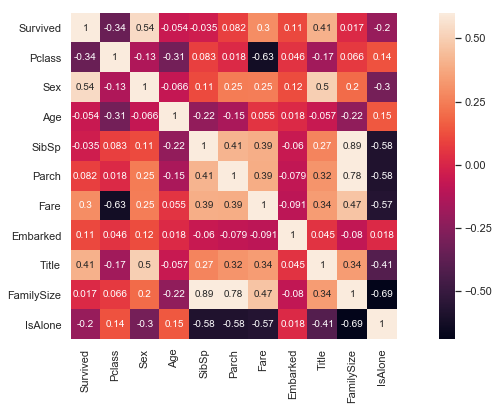

In [66]:
plt.figure(figsize=(15,6))
sns.heatmap(train.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True)

In [69]:
features_drop = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'FamilySize']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId', 'AgeBand', 'FareBand'], axis=1)

In [70]:
train.head(3)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,0,1,0
1,1,1,1,2,0,1,3,0
2,1,3,1,1,0,0,2,1


In [71]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,0,2,1,1
1,893,3,1,2,0,0,3,0
2,894,2,0,3,0,2,1,1
3,895,3,0,1,0,0,1,1
4,896,3,1,1,0,0,3,0


In [72]:
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']
X_test = test.drop("PassengerId", axis=1).copy()

X_train.shape, y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [74]:
#Logistic Regression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round( clf.score(X_train, y_train) * 100, 2)
print (str(acc_log_reg) + ' percent')

80.58 percent


In [75]:
#Support Vector Machine (SVM)
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_train, y_train) * 100, 2)
print (acc_svc)

82.49


In [76]:
#Decision Tree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_decision_tree = clf.predict(X_test)
acc_decision_tree = round(clf.score(X_train, y_train) * 100, 2)
print (acc_decision_tree)

84.06


In [77]:
#Random Forest
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print (acc_random_forest)

84.06


In [78]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines','Decision Tree','Random Forest'],
    
    'Score': [acc_log_reg, acc_svc, acc_decision_tree, acc_random_forest]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
2,Decision Tree,84.06
3,Random Forest,84.06
1,Support Vector Machines,82.49
0,Logistic Regression,80.58


In [79]:
final = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred_random_forest
    })

In [82]:
final

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
